<a href="https://colab.research.google.com/github/nabilaaaa24/Machine-Learning/blob/main/ML_Praktikum_Modul_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Data & Preprocessing

Libraries

In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

### Load Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Dataset/Prak ML/Banking Dataset.csv', header=0, sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Tampilkan 5 data teratas dan 5 data terbawah dari dataset untuk memahami struktur dan isi data.

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Tampilkan ringkasan statistik dari dataset, termasuk mean, median, deviasi standar, nilai minimum, maksimum, dan quartil.

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Preprocessing

Mengatasi Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Encode Categorical Variable

In [ ]:
label_encoders = {}
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### Pisahkan fitur (features) dan target (target variable).

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

### Split dataset menjadi 80% data train dan 20% data test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standarisasi Data Numerik

In [ ]:
scaler = StandardScaler()

# Fit pada data training, transform pada data train dan test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Modelling

### Bangun Model Neural Network (1 input layer dg jumlah neuron minimal 64 unit, 1 hidden layer dg jumlah neuron yg anda tentukan sendiri, 1 output layer dengan 1 neuron yang menggunakan aktivasi sigmoid)

In [ ]:
model = Sequential()

# Input layer dengan 64 neuron
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# Hidden layer
model.add(Dense(16, activation='relu'))
# Output layer dengan 1 neuron dan aktivasi sigmoid
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Model

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,145 (8.38 KB)

 Trainable params: 2,145 (8.38 KB)

 Non-trainable params: 0 (0.00 B)

### Latih Model min 100 epoch

In [ ]:
# Latih model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/100
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8693 - loss: 13.0587 - val_accuracy: 0.8794 - val_loss: 0.3755
Epoch 2/100
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8821 - loss: 0.3673 - val_accuracy: 0.8794 - val_loss: 0.3689
Epoch 3/100
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8848 - loss: 0.3574 - val_accuracy: 0.8794 - val_loss: 0.3685
Epoch 4/100
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8868 - loss: 0.3528 - val_accuracy: 0.8794 - val_loss: 0.3682
Epoch 5/100
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8837 - loss: 0.3587 - val_accuracy: 0.8794 - val_loss: 0.3680
Epoch 6/100
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8817 - loss: 0.3626 - val_accuracy: 0.8794 - val_loss: 0.3681
Epoch 7/100
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8859 - loss: 0.3539 - val_accuracy: 0.8794 - val_loss: 0.3678
Epoch 8/100
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8844 - loss: 

# 3. Evaluasi

### Tampilkan plot akurasi dan loss dari hasil pelatihan model

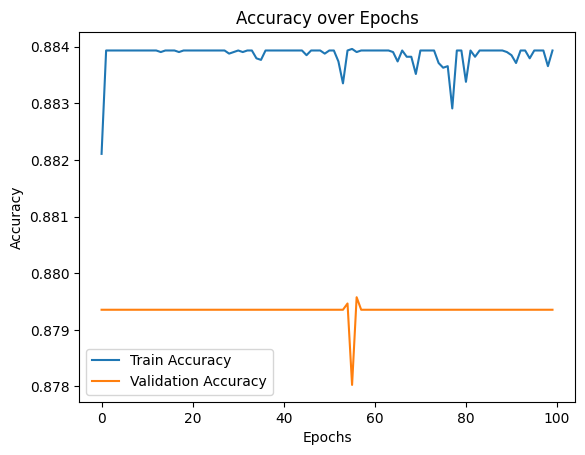

In [ ]:
# Visualisasi akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

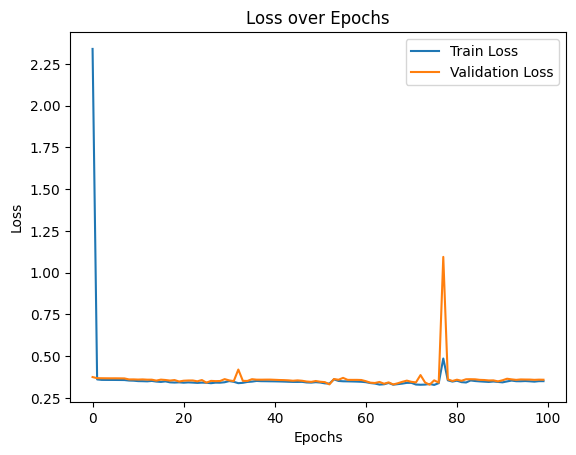

In [ ]:
# Visualisasi loss pelatihan dan validasi
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Buat Classification Report berserta dengan keterangan labelnya

In [ ]:
# Evaluasi model
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_classes, zero_division=0))

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043

